<a href="https://colab.research.google.com/github/xxcramseyxx/HybridDLearningmodel/blob/main/HybridDL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Credit_Card_Applications.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

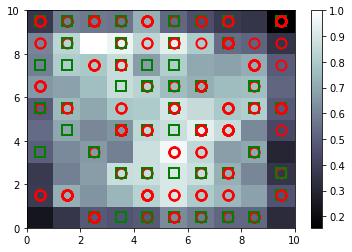

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
  w = som.winner(x)
  plot(
      w[0] + 0.5,
      w[1] + 0.5,
      markers[y[i]],
      markeredgecolor=colors[y[i]],
      markerfacecolor=('None'),
      markersize =(10),
      markeredgewidth =(2)    
  )

show()

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,1)], mappings[(5,3)],mappings[(6,4)],mappings[(5,8)]),axis=0)
frauds = sc.inverse_transform(frauds)

In [ ]:
print('Customer Fraud IDs')
for i in frauds[:, 0]:
  print(int(i))

In [ ]:
customers = df.iloc[:, 1:].values
is_fraud = np.zeros(len(df))
print(customers)
print(is_fraud)

In [ ]:
for i in range(len(df)):
  if df.iloc[i,0] in frauds:
    is_fraud[i]=1

In [ ]:
print(is_fraud)

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [ ]:
class_ann = tf.keras.models.Sequential()
class_ann.add(tf.keras.layers.Dense(units = 2, activation='relu'))
class_ann.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
class_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
class_ann.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 979us/step - loss: 0.1918 - accuracy: 0.9435
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1904 - accuracy: 0.9435


In [ ]:
y_pred = class_ann.predict(customers)
y_pred = np.concatenate((df.iloc[:,0:1].values,y_pred), axis=1) #0:1 takes only the values from 0-1 but makes the array two dimensional
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)


[[1.58052610e+07 5.18351793e-04]
 [1.56660960e+07 9.01520252e-04]
 [1.56233690e+07 1.18935108e-03]
 ...
 [1.57769210e+07 3.12115490e-01]
 [1.56773950e+07 3.13936710e-01]
 [1.57901130e+07 8.62181067e-01]]
